In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Creating dataFrame structure 

In [2]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [5]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [6]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [7]:
var_thres.get_support()

array([ True,  True,  True])

In [8]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [9]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

### Plotting Points

Text(0, 0.5, 'Sepal Width')

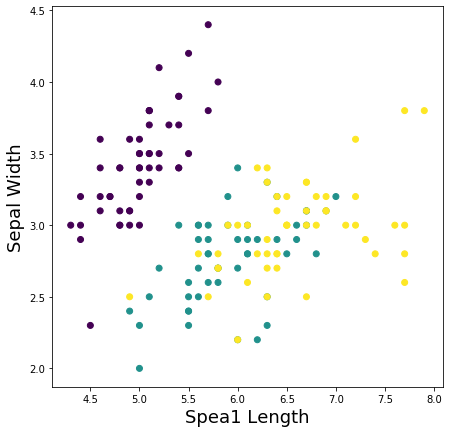

In [11]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Defining colors and ploting centroids for all clusters

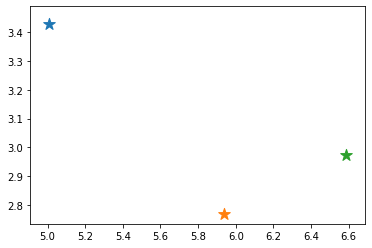

In [23]:
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], marker='*',s=150)
plt.show()

### Showing complete graph

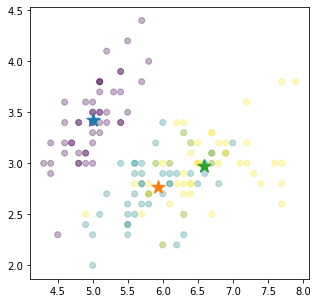

In [33]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],marker='*',s=200)
plt.show()

# Stage 2: Assignment Stage

### Assignment function : Calculating distance and updating dataFrame

In [37]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return df

In [38]:
df = assignment(df, centroids)

In [39]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest
0,5.1,3.5,0,0.118406,1.109863,1.578233,0
1,4.9,3.0,0,0.440931,1.061224,1.688200,0
2,4.7,3.2,0,0.381602,1.308662,1.901478,0
3,4.6,3.1,0,0.521939,1.376153,1.991989,0
4,5.0,3.6,0,0.172105,1.250998,1.706933,0
...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2
146,6.3,2.5,2,1.592363,0.453206,0.554635,1
147,6.5,3.0,2,1.554098,0.609094,0.091761,2
148,6.2,3.4,2,1.194328,0.683078,0.576212,2


### Visualisation of clusters with colors:

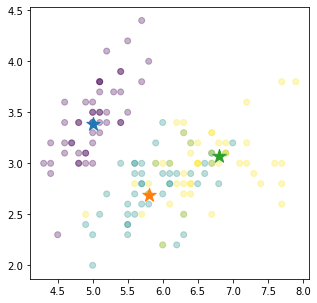

In [48]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'],c=iris.target, alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], marker='*',s=200)

plt.show()

# Stage 3: Update Stage

### Update function : Updating the centroids

In [43]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [44]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

### Visualising the graph with updated centroids

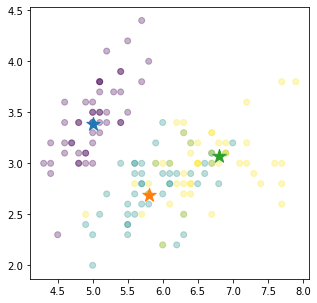

In [49]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='*',s=200)

plt.show()

## Repeat assignment stage to reassign the points with clusters

In [50]:
df = assignment(df, centroids)

### Visualising the updated graph

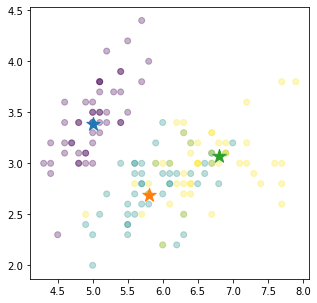

In [53]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], marker='*',s=200)
plt.show()

## Continuing until all assigned clusters don't change any more

In [54]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result :

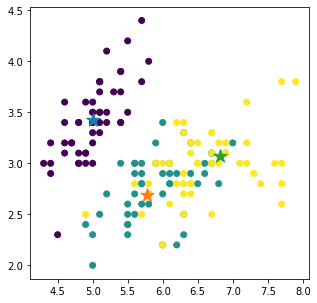

In [55]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'],c=iris.target )
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], marker='*',s=200 )

plt.show()